## Análisis Exploratorio

#### Importación de librerías

In [15]:
import ast
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk import bigrams
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
recipes = pd.read_csv("data/RAW_recipes.csv")
pd.set_option('display.max_columns', None)
recipes['ingredients'] = recipes['ingredients'].apply(ast.literal_eval)
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8


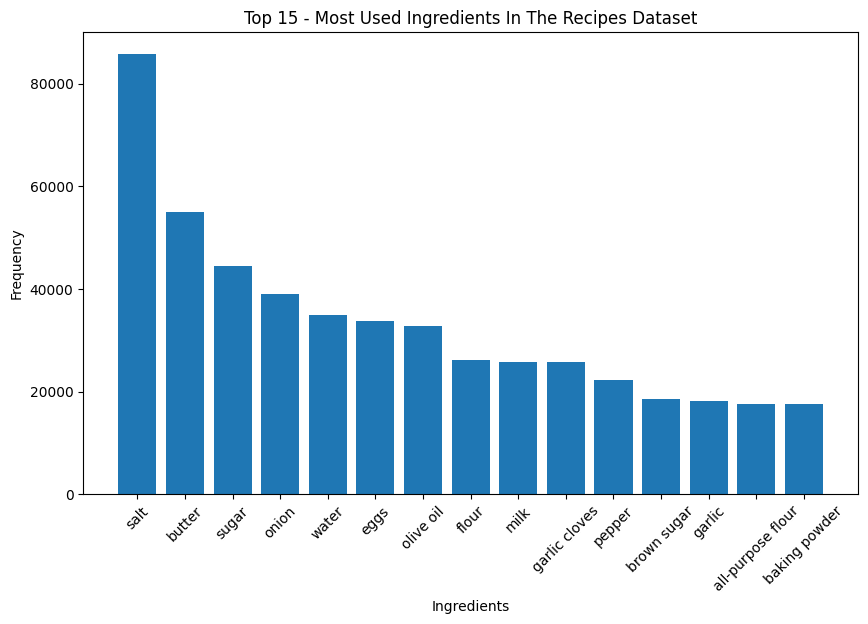

In [17]:
ingredients = []
for ingredients_list in recipes["ingredients"]: ingredients.extend(ingredients_list)

ingredients_count = Counter(ingredients)
top_15_ingredientes = ingredients_count.most_common(15)
ingredients, count = zip(*top_15_ingredientes)

plt.figure(figsize=(10, 6))
plt.bar(ingredients, count)
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 15 - Most Used Ingredients In The Recipes Dataset')
plt.xticks(rotation=45)
plt.show()

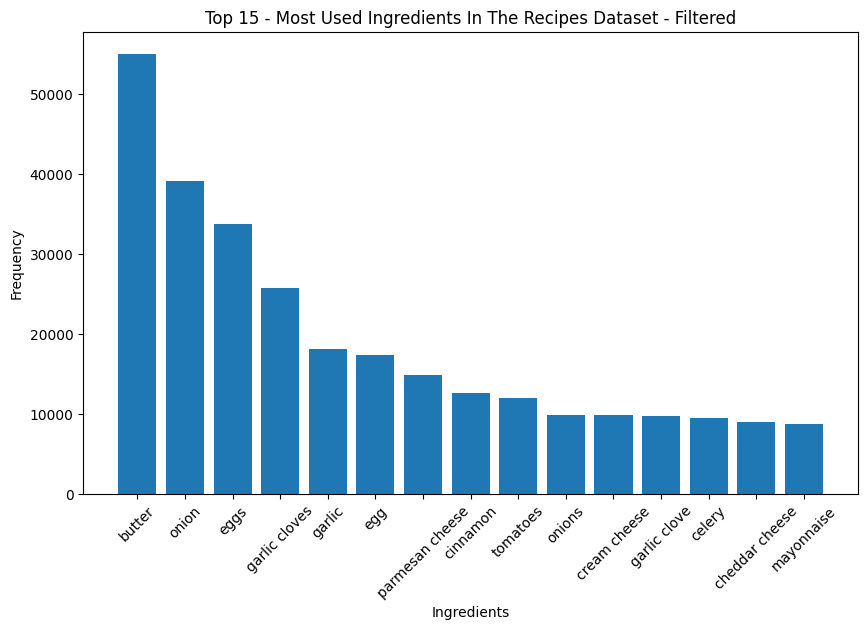

In [18]:
ingredients = []
for ingredients_list in recipes["ingredients"]: ingredients.extend(ingredients_list)

exclude = [
    'salt', 
    'sugar', 
    'brown sugar', 
    'water', 
    'olive oil', 
    'vegetable oil', 
    'flour', 
    'pepper', 
    'black pepper', 
    'salt and pepper', 
    'lemon juice', 
    'all-purpose flour', 
    'baking powder', 
    'baking soda',
    'vanilla',
    'vanilla extract',
    'honey',
    'milk',
    'cinammon',
    'sour cream',
    'unsalted butter',
    'paprika',
    'oil',
    'soy sauce',
    'worcestershire sauce',
    'extra virgin olive oil',
    'cinammon',
    'garlic powder',
    'chicken broth'
    ]
ingredients_count = Counter(ingredients)
ingredients_count_filter = {ing: cnt for ing, cnt in ingredients_count.items() if ing not in exclude}
top_15_ingredients = Counter(ingredients_count_filter).most_common(15)
ingredients, count = zip(*top_15_ingredients)


plt.figure(figsize=(10, 6))
plt.bar(ingredients, count)
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 15 - Most Used Ingredients In The Recipes Dataset - Filtered')
plt.xticks(rotation=45)
plt.show()

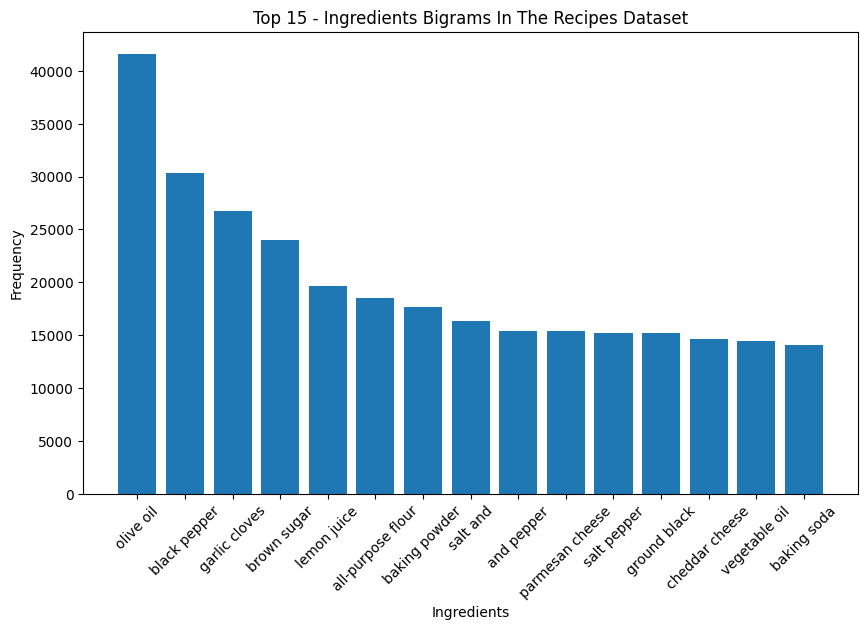

In [19]:
def gen_bigrams(ingredients_list, filter_=False):
    if not filter_: all_ingredients = [i for list_ in ingredients_list for i in list_]
    else: all_ingredients = [i for list_ in ingredients_list for i in list_ if i not in exclude]
    return list(bigrams(nltk.word_tokenize(' '.join(all_ingredients))))

recipes_bigrams = gen_bigrams(recipes['ingredients'].tolist())
bigram_counts = Counter(recipes_bigrams)
most_common_bigrams = bigram_counts.most_common(15)

bigrams_, count = zip(*most_common_bigrams)
bigrams_ = [' '.join(bigram) for bigram in bigrams_]

plt.figure(figsize=(10, 6))
plt.bar(bigrams_, count)
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 15 - Ingredients Bigrams In The Recipes Dataset')
plt.xticks(rotation=45)
plt.show()

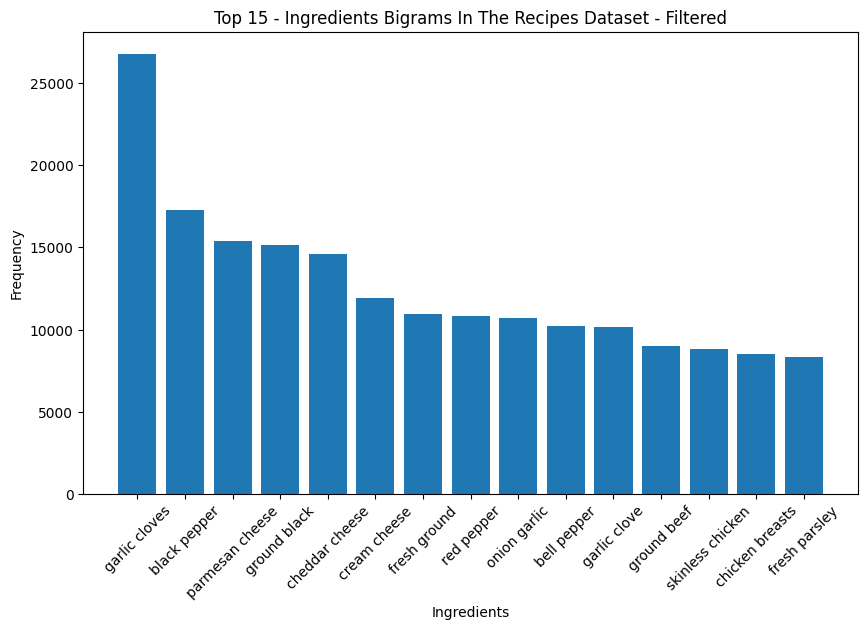

In [20]:
recipes_bigrams_filter = gen_bigrams(recipes['ingredients'].tolist(), filter_=True)
bigram_counts_filter = Counter(recipes_bigrams_filter)
most_common_bigrams_filter = bigram_counts_filter.most_common(15)

bigram_counts_filter, count_filtered = zip(*most_common_bigrams_filter)
bigram_counts_filter = [' '.join(bigram) for bigram in bigram_counts_filter]

plt.figure(figsize=(10, 6))
plt.bar(bigram_counts_filter, count_filtered)
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 15 - Ingredients Bigrams In The Recipes Dataset - Filtered')
plt.xticks(rotation=45)
plt.show()

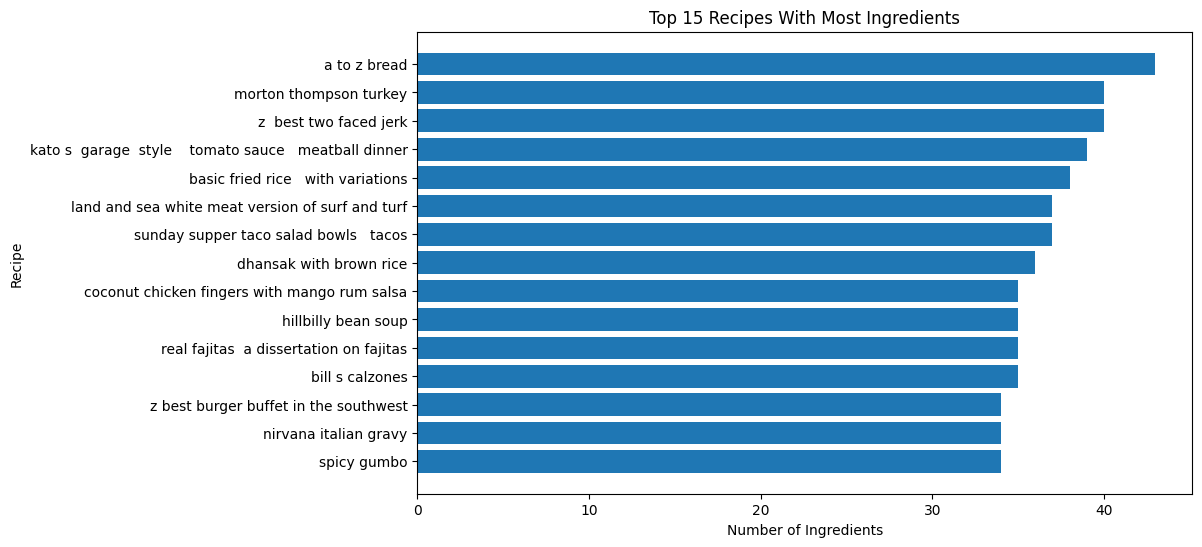

In [24]:
recipes_with_most_ingrs = recipes.sort_values(by='n_ingredients', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(recipes_with_most_ingrs['name'], recipes_with_most_ingrs['n_ingredients'])
plt.ylabel('Recipe')
plt.xlabel('Number of Ingredients')
plt.title('Top 15 Recipes With Most Ingredients')
plt.gca().invert_yaxis() 
plt.show()


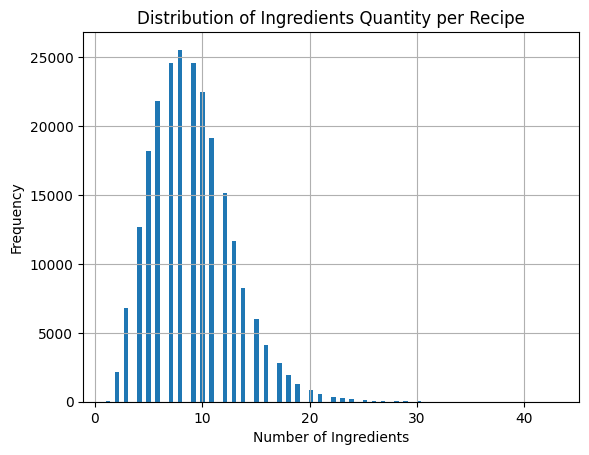

In [27]:
recipes['n_ingredients'].hist(bins=100)
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.title('Distribution of Ingredients Quantity per Recipe')
plt.show()

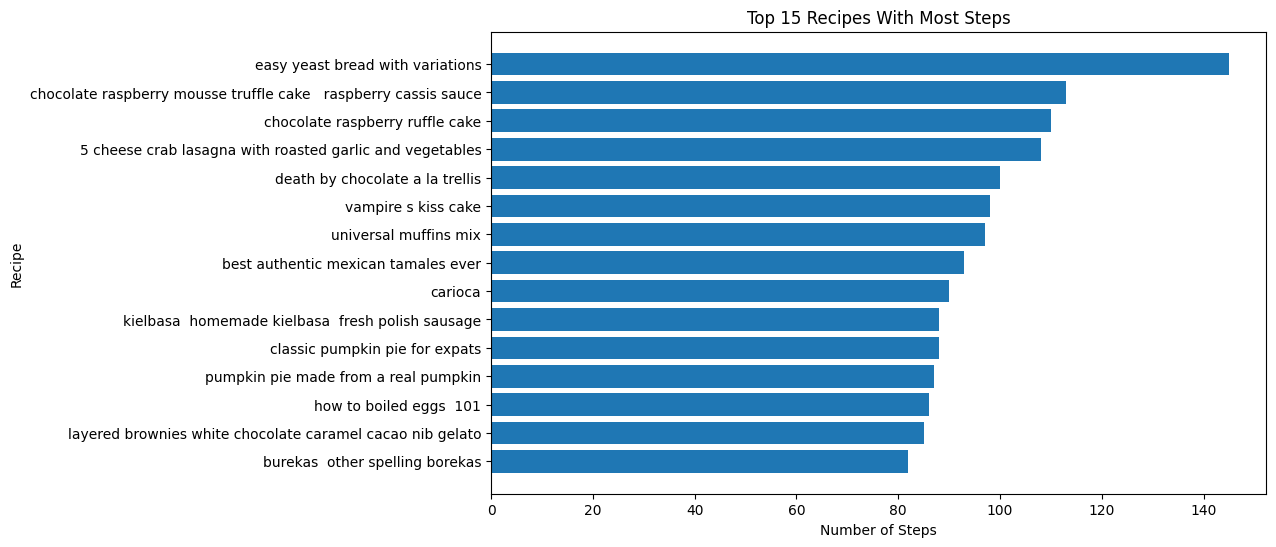

In [25]:
recipes_with_most_steps = recipes.sort_values(by='n_steps', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(recipes_with_most_steps['name'], recipes_with_most_steps['n_steps'])
plt.ylabel('Recipe')
plt.xlabel('Number of Steps')
plt.title('Top 15 Recipes With Most Steps')
plt.gca().invert_yaxis()
plt.show()

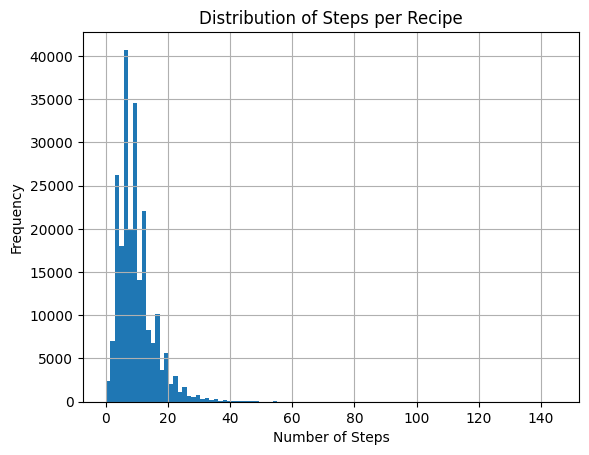

In [26]:
recipes['n_steps'].hist(bins=100)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Steps per Recipe')
plt.show()